# 5) Display times

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

def timestamp_to_seconds(time):
    return sum(x * int(t) for x, t in zip([3600, 60, 1], time.split(":"))) 

In [65]:
def plot_times(file, average, batch_size):

    df = pd.read_csv(f"{file}_times.txt", header=None)
    df.drop(df.tail(1).index, inplace=True)

    df['factor'] = round(df[1].apply(lambda x: float(str(x).replace("x",""))) / df[2].apply(lambda x: float(str(x).replace("x",""))), 2)
    df.drop([1,2], axis=1, inplace=True)
    df.set_axis(['algorithm', 'time', 'factor'], axis=1, inplace=True)

    df = df.pivot(index='algorithm', columns='factor', values='time')

    df['avg'] = [np.average(df.iloc[i,:]) for i in range(len(df))]
    total_time = sum([sum(df.iloc[i,:]) for i in range(len(df))])

    total_time = str(timedelta(seconds = int(total_time)))
    title = f"{file}: Average time across batch_size {batch_size} (total {total_time})" if average else f"{file}: Total time for batch_size {batch_size} (total time {total_time})"
    if average:
        df = (df/batch_size).round(3)

    plt.figure(figsize=(10, 10), dpi=300)
    ax = sns.heatmap(df, annot=True, cmap = sns.cm.rocket_r, vmin=df.values.min(), vmax=df.values.max(), fmt='g')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Global Time Warp")
    ax.set_ylabel("Algorithm")

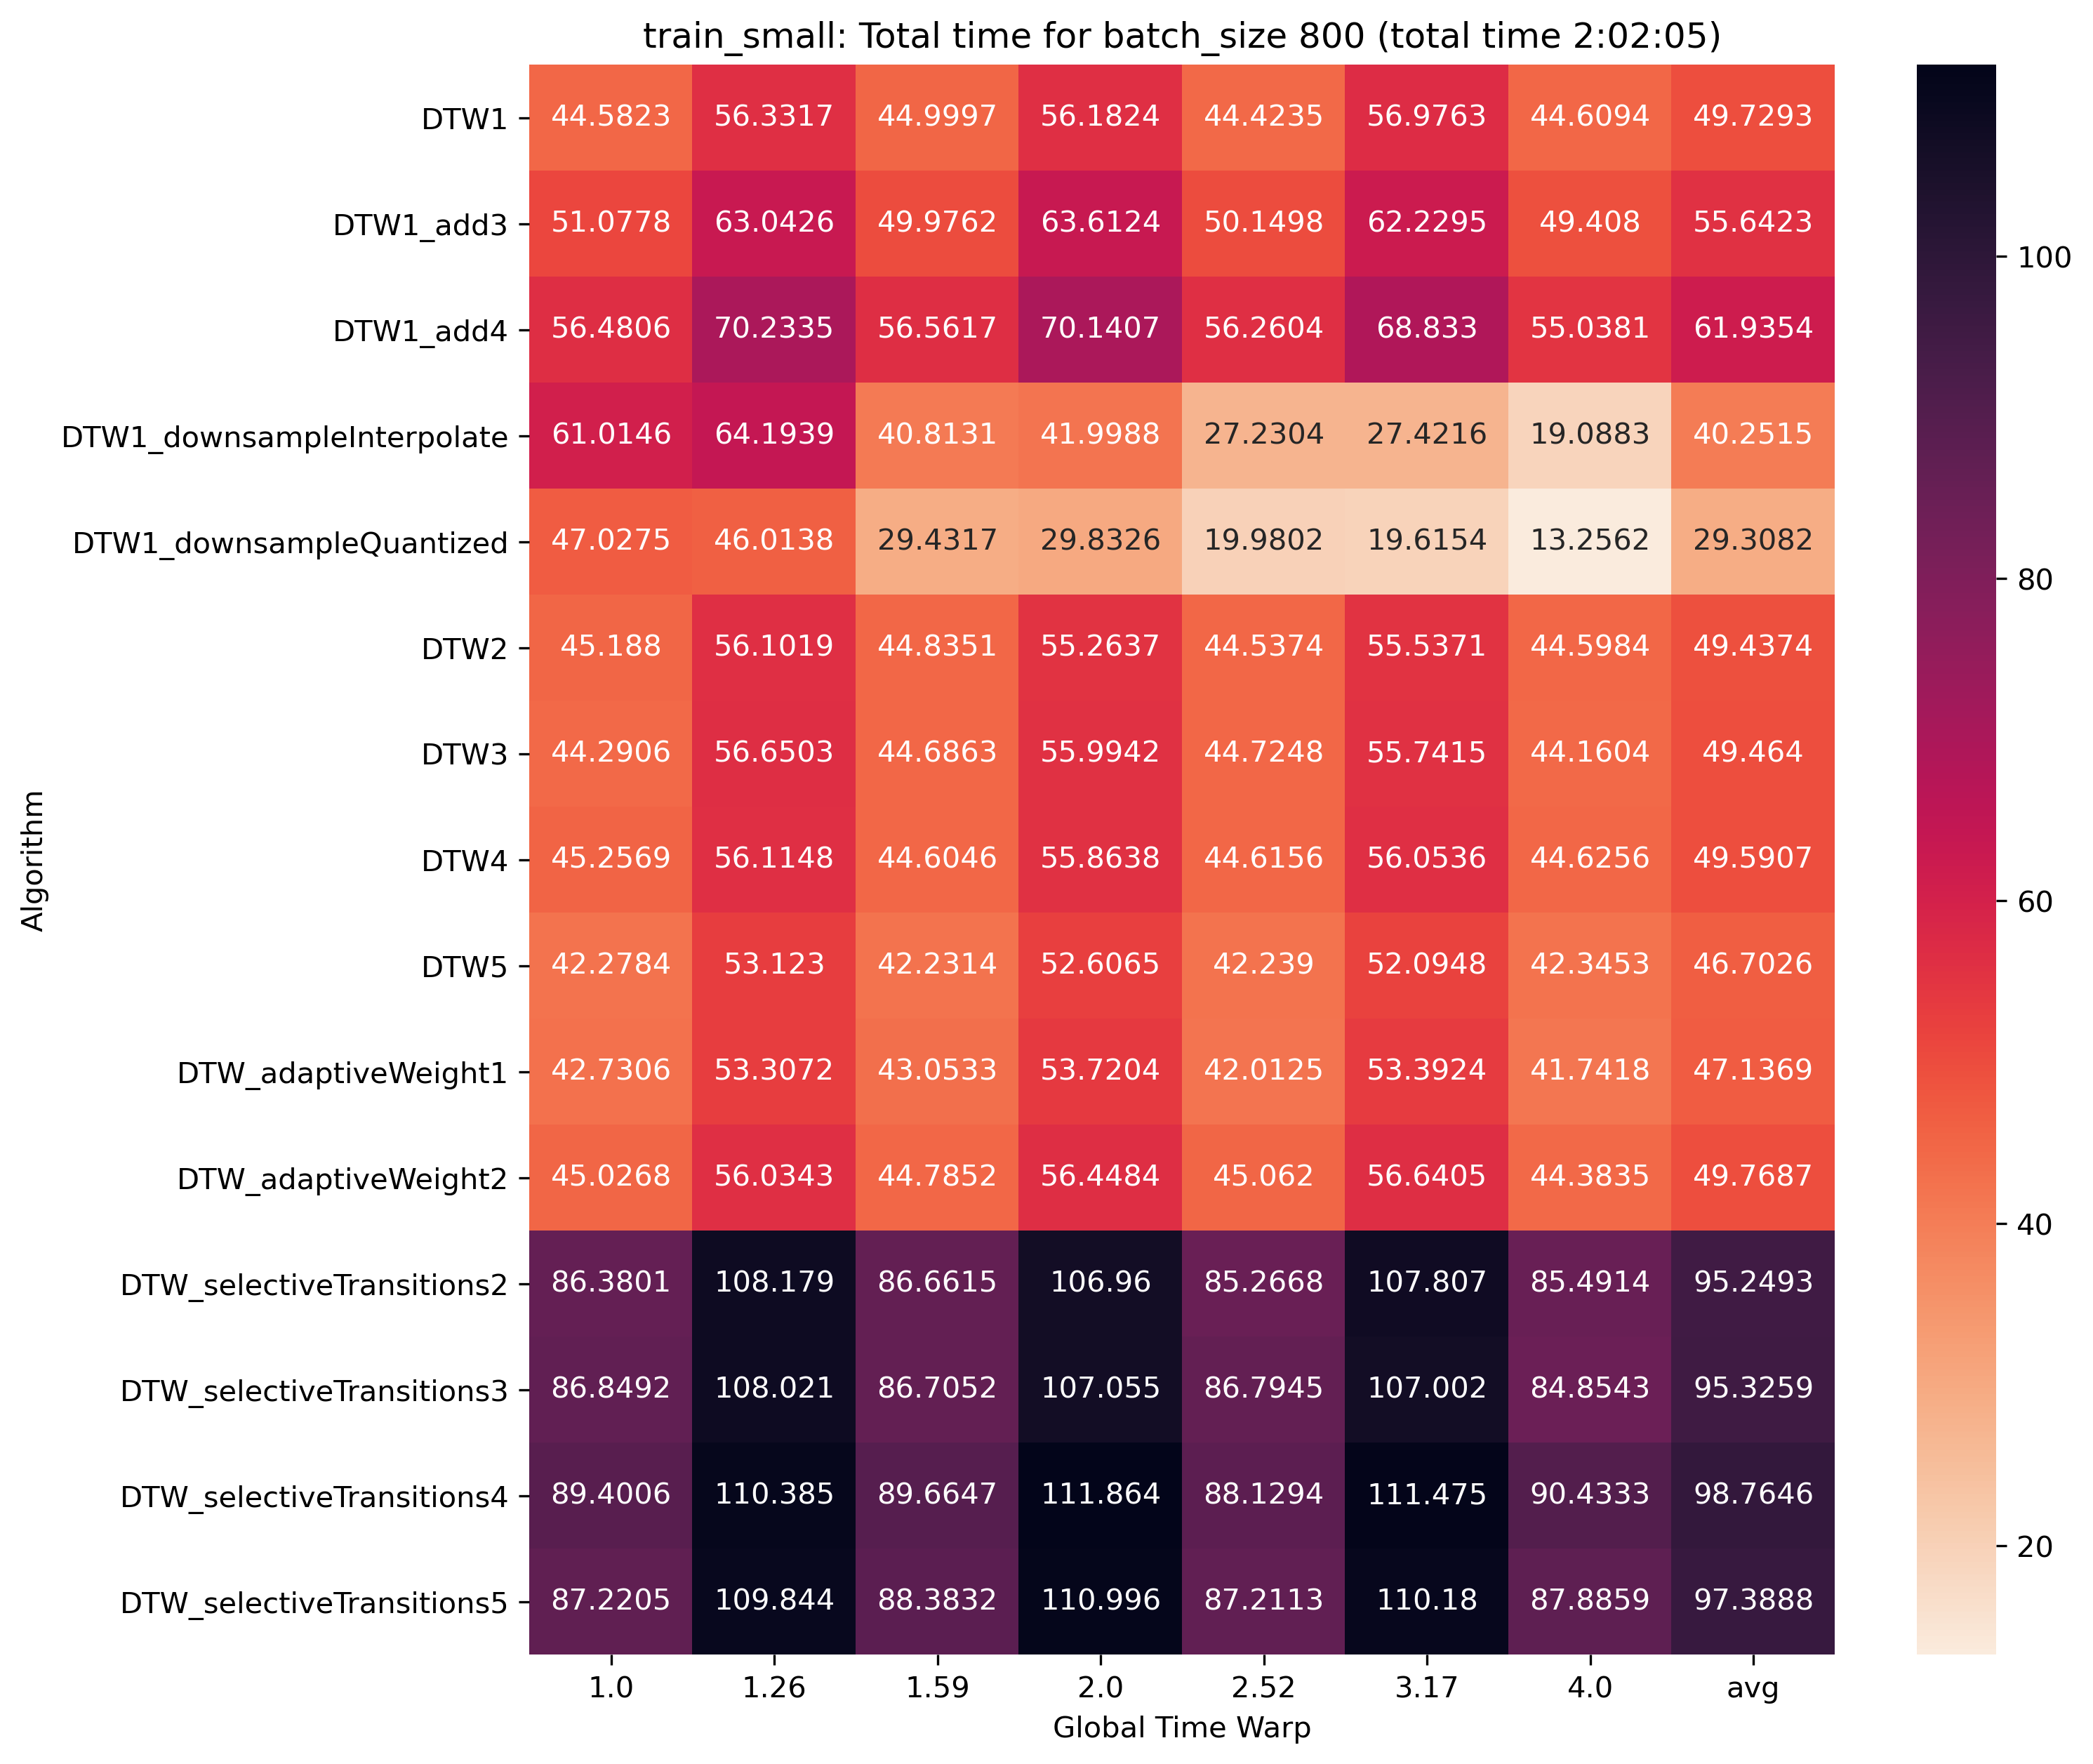

In [66]:
plot_times('train_small', average=False, batch_size=800)

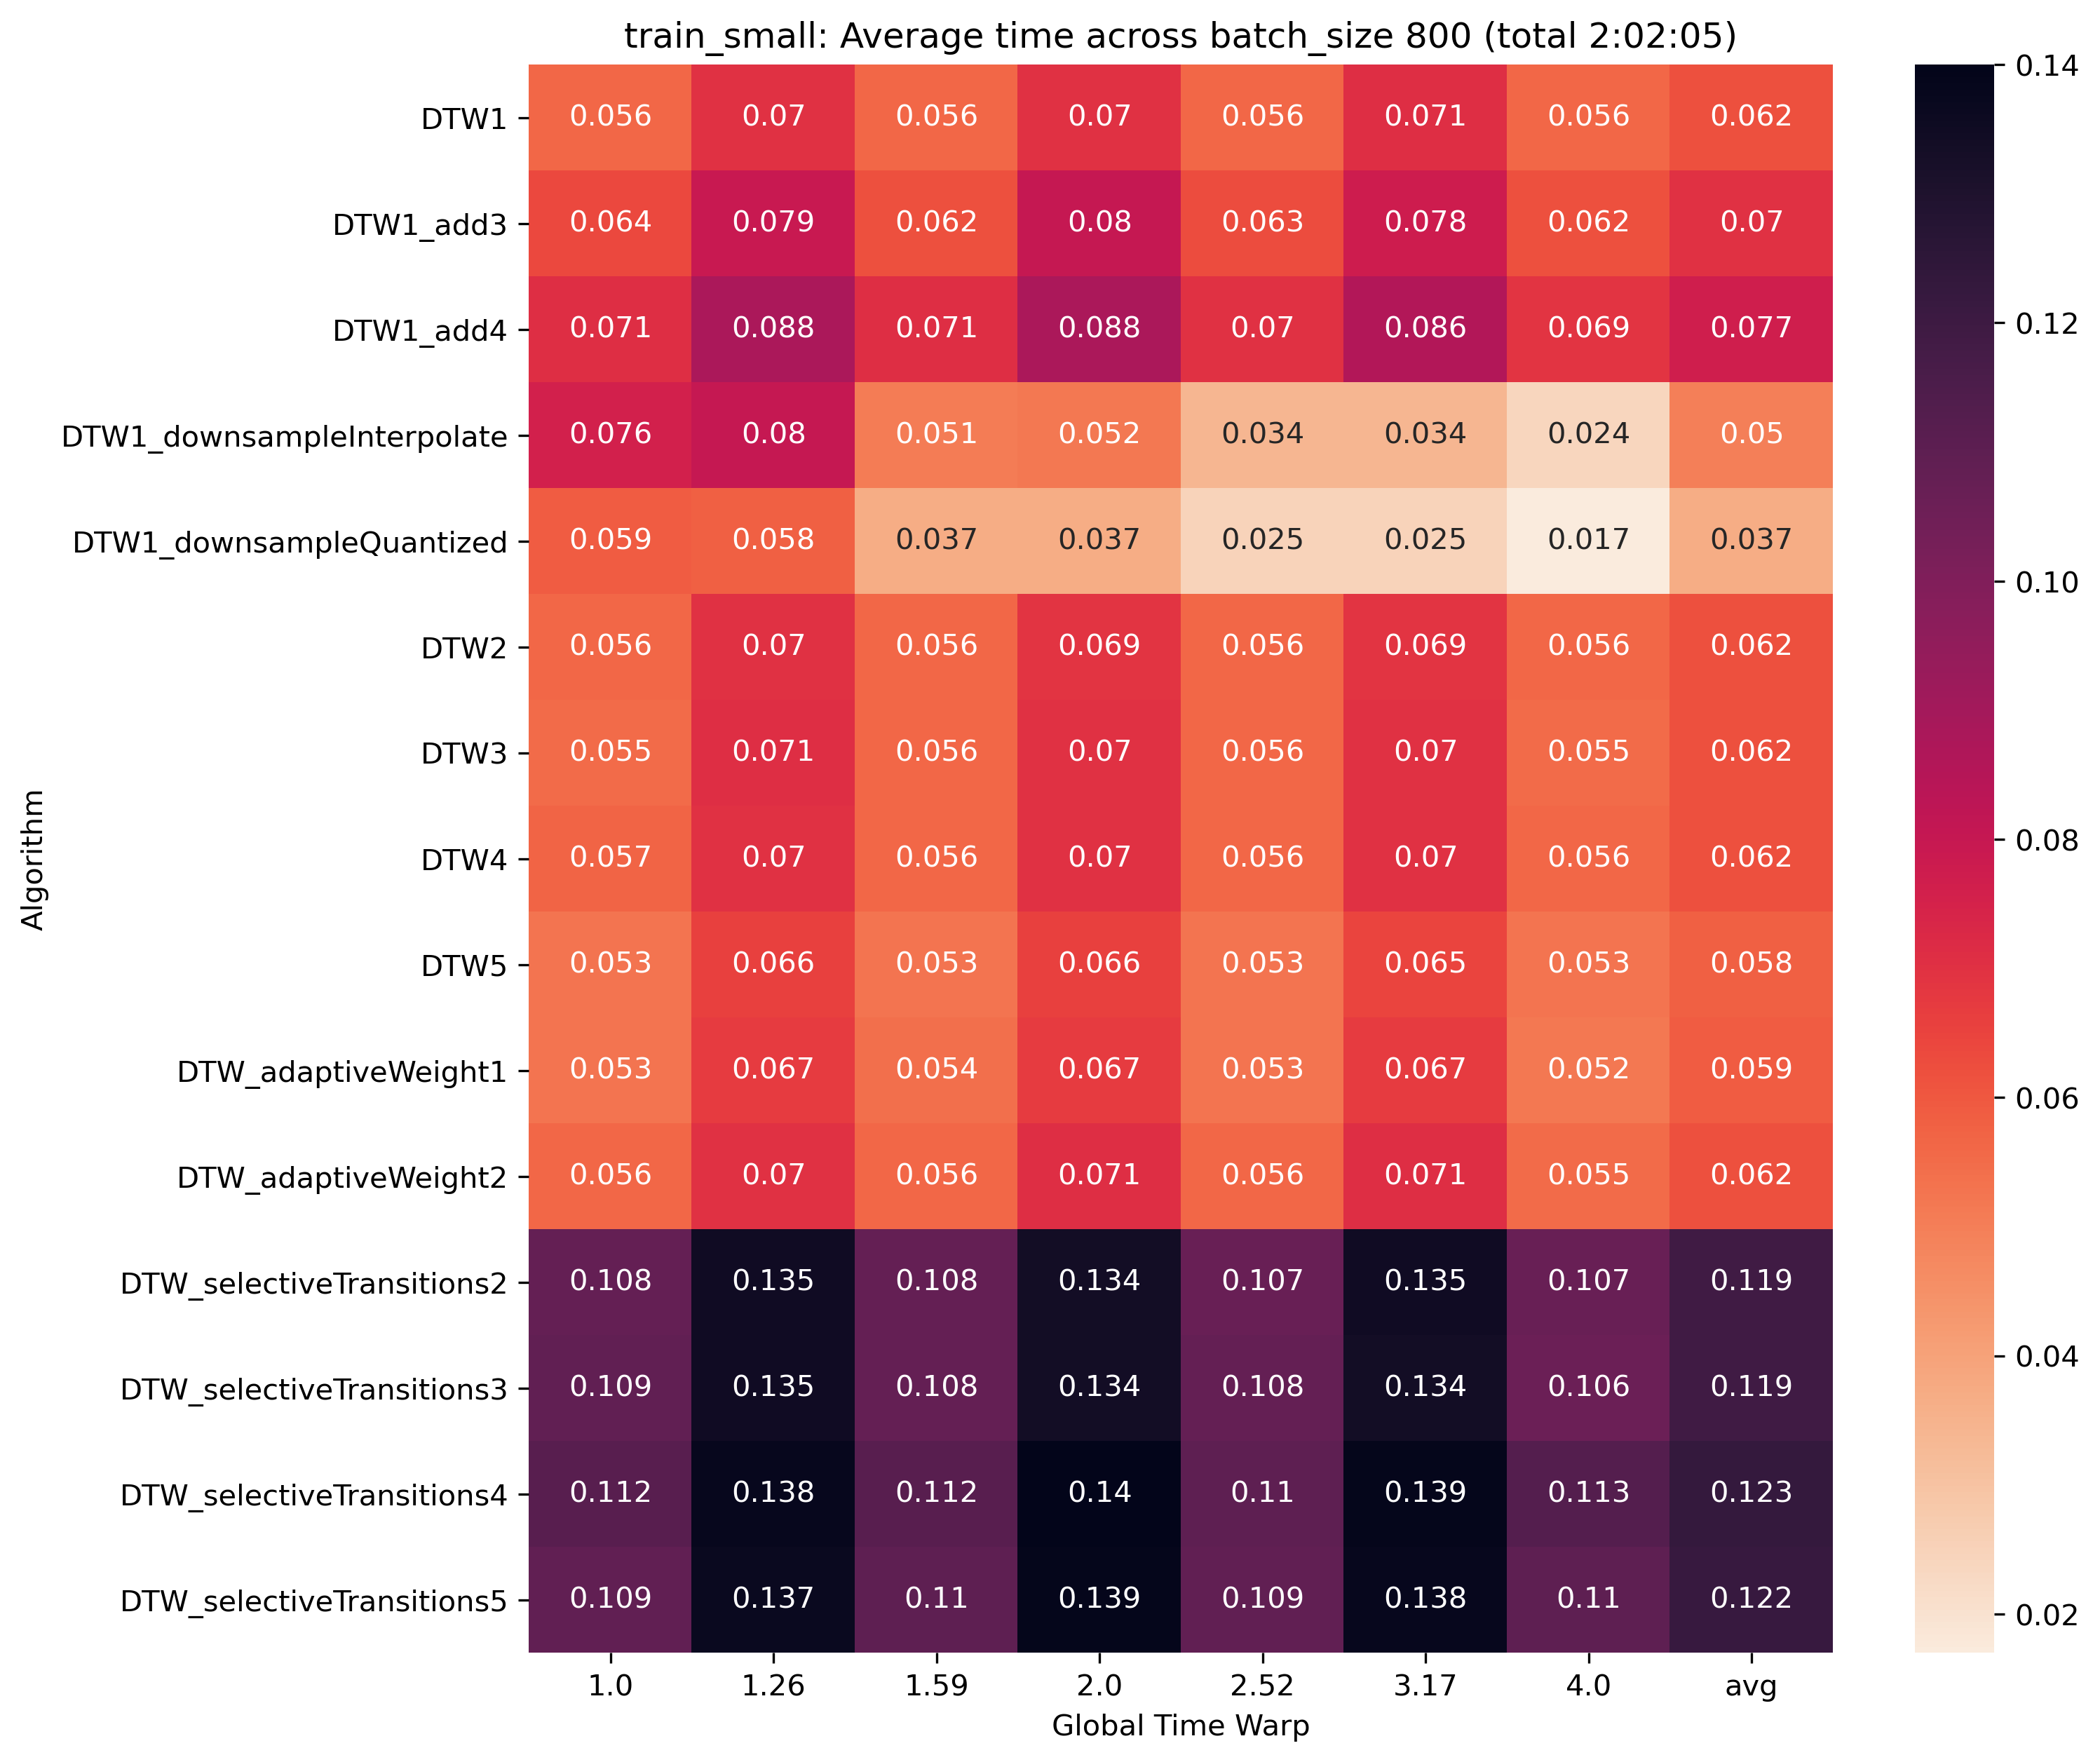

In [67]:
plot_times('train_small', average=True, batch_size=800)

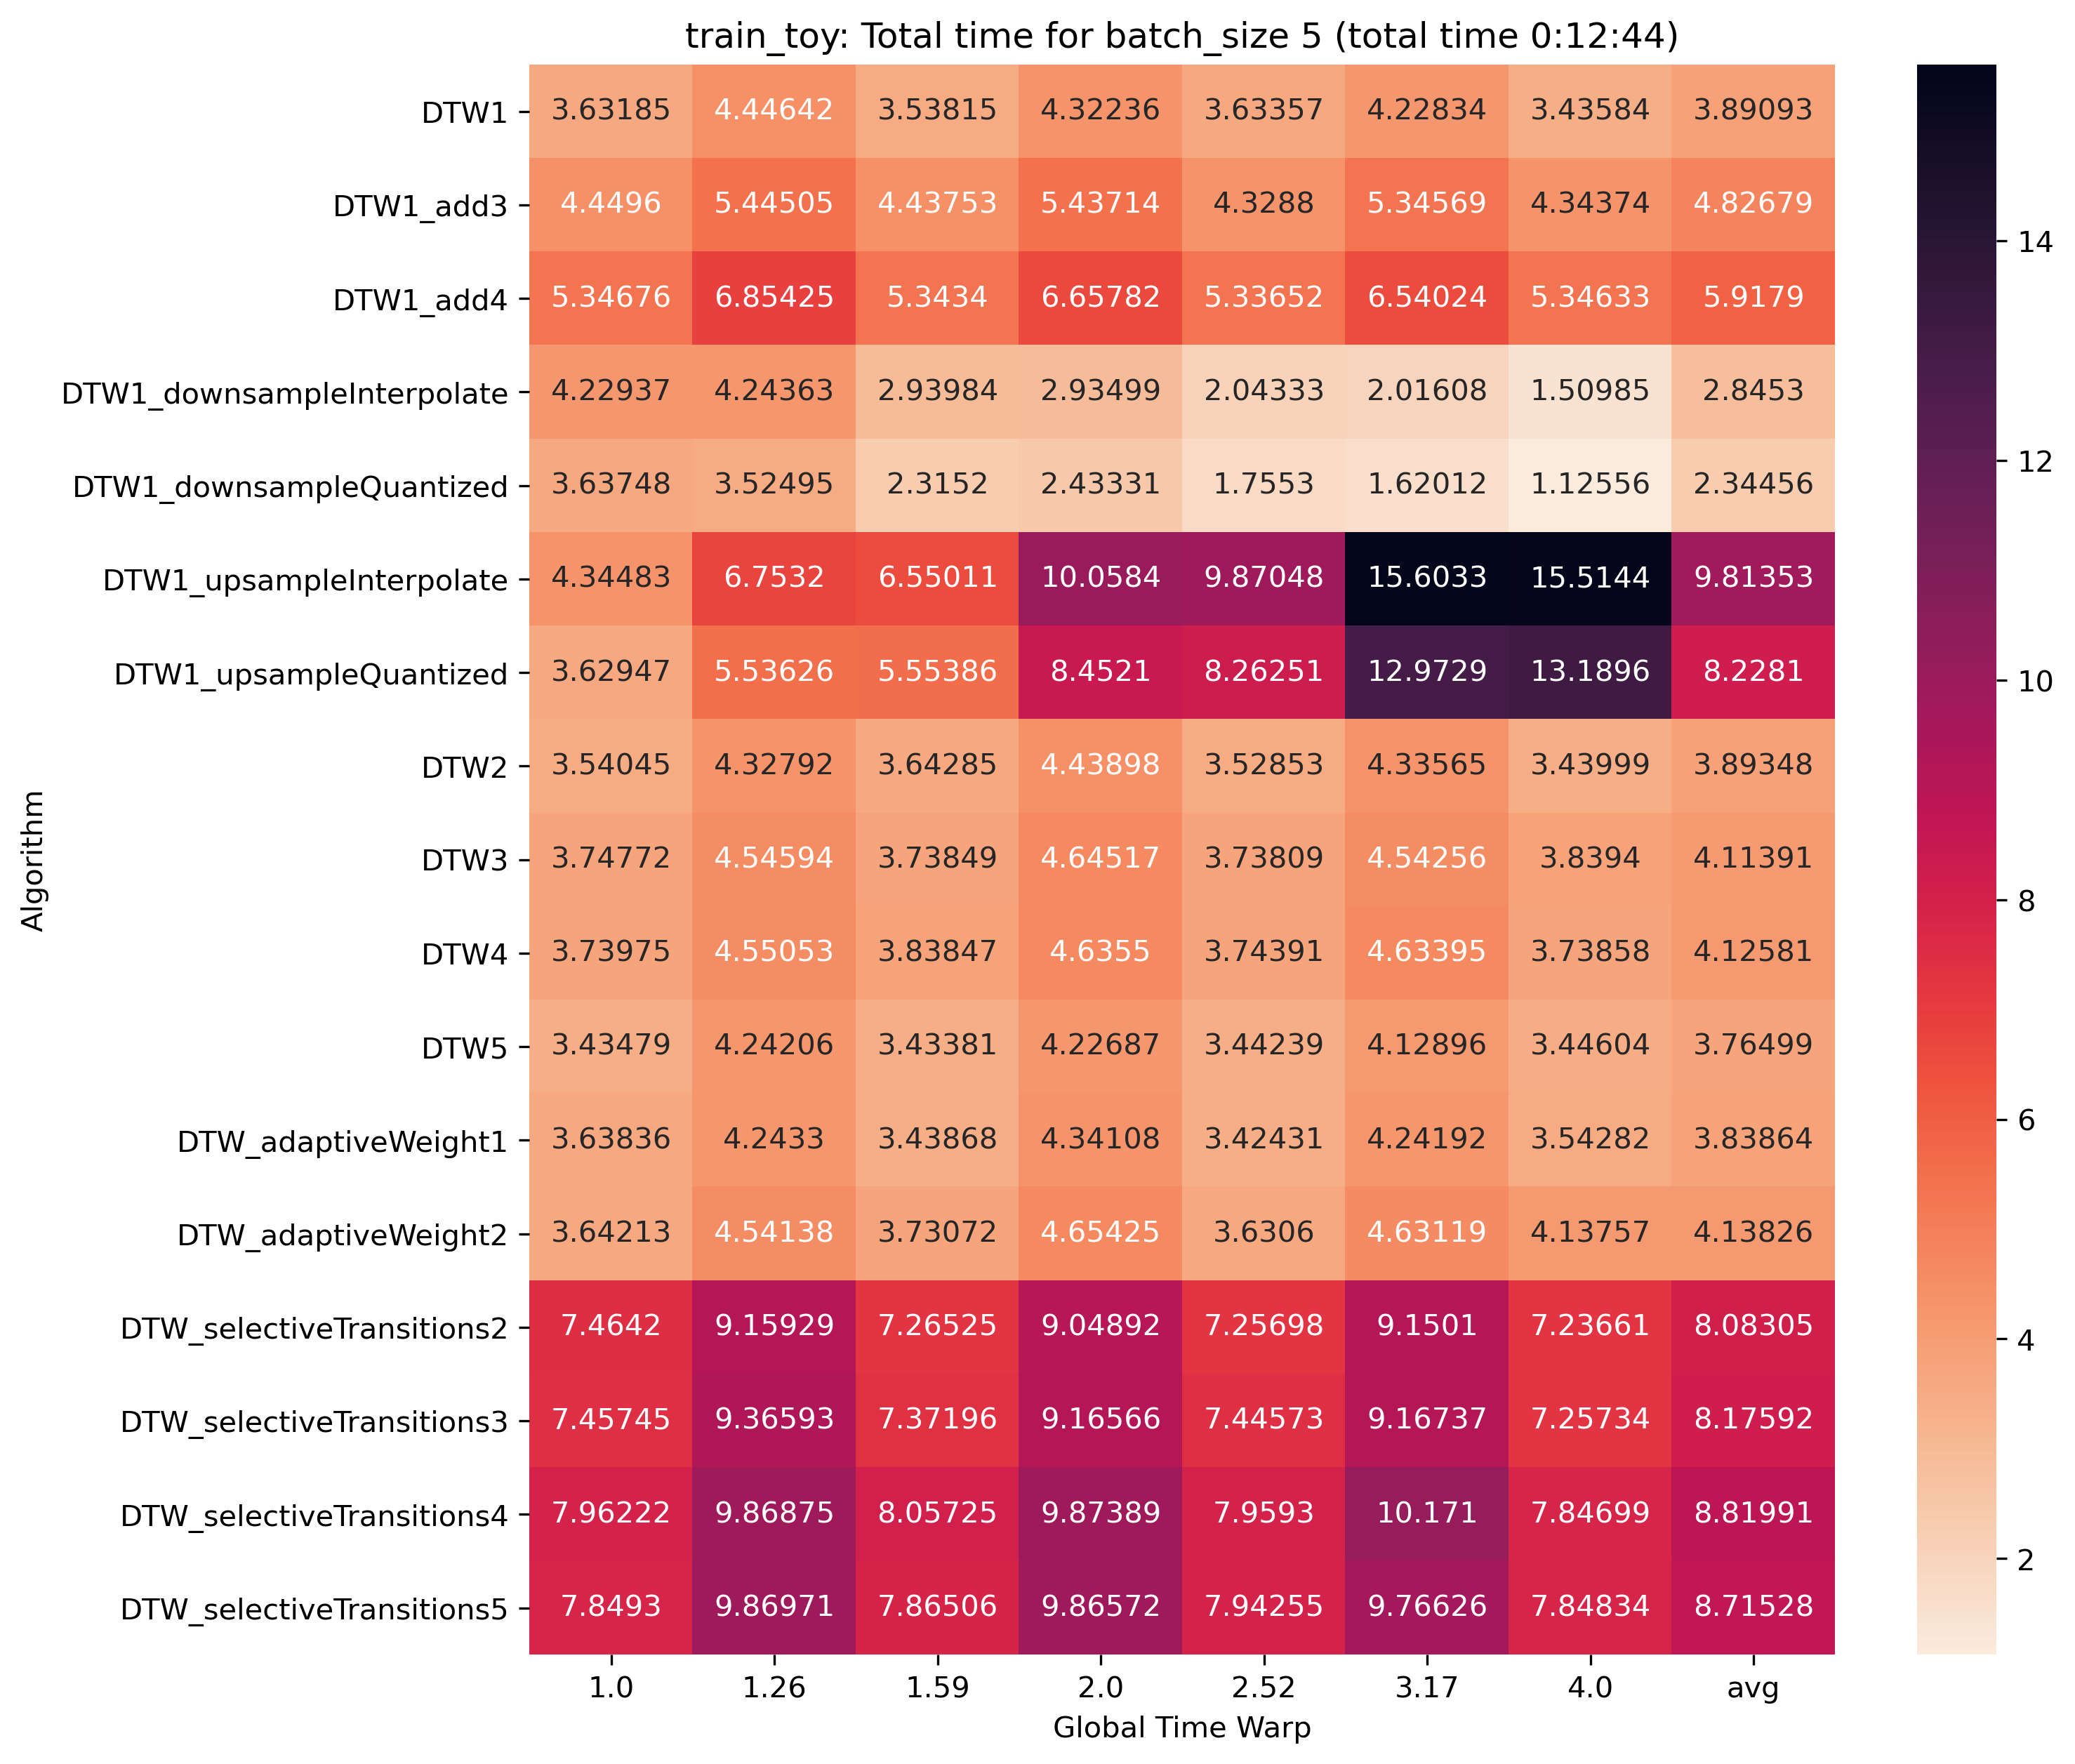

In [68]:
plot_times('train_toy', average=False, batch_size=5)

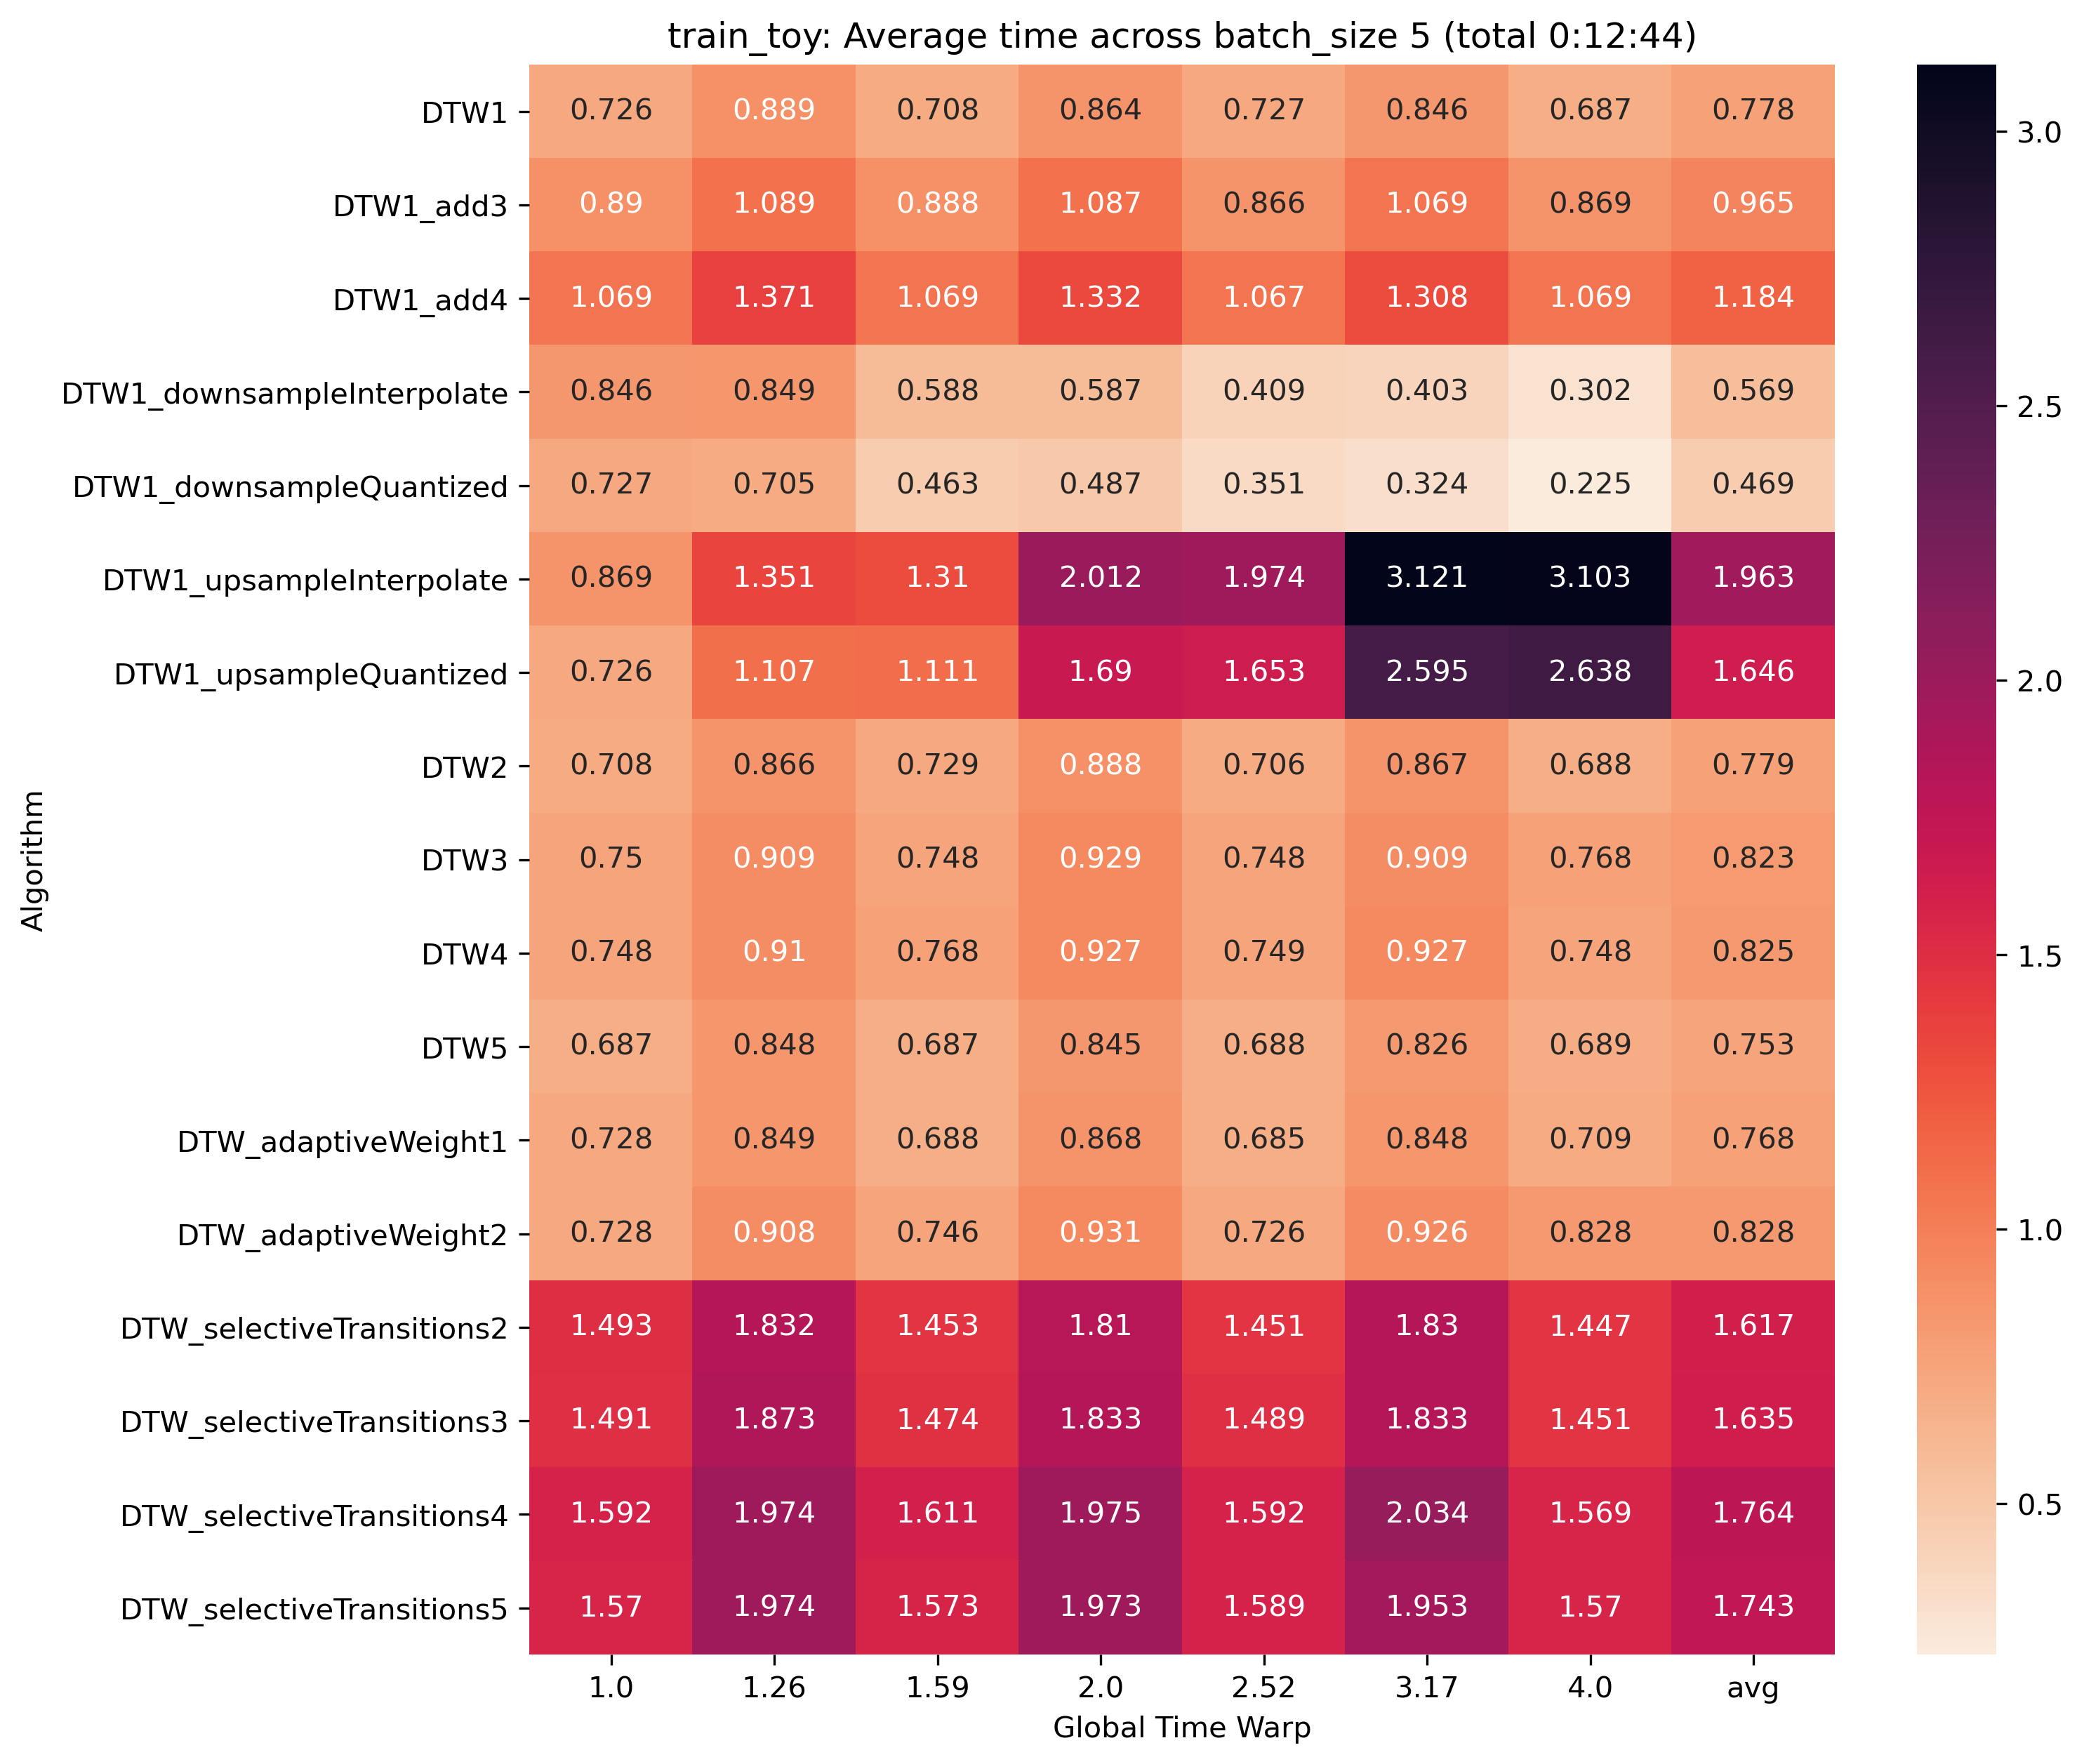

In [69]:
plot_times('train_toy', average=True, batch_size=5)